<a href="https://colab.research.google.com/github/sripragnabitra/TimeSeries/blob/main/MLCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Time Series Forecasting***

The project is based on Time Series Forecasting to solve a problem of shortage of taxi at a particular renting station and also to intimate the customers about when the demand is expected to go high (So they may pre-book).

The solution is to forecast number of bookings in coming hours. The project created using machine learning algorithms uses different Regressor models to get different accuracy scores.

In [60]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/sripragnabitra/TimeSeries/main/Taxi.csv', encoding= 'unicode_escape')
df.shape

(8760, 14)

Pre Processing

In [ ]:
df.columns=['Date', 'Rented Taxi Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day']

In [ ]:
df.head()

,Date,Rented Taxi Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Taxi Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Taxi Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.isna().sum()

Date                         0
Rented Taxi Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#convert the "date" column into 3 different columns i.e "year","month","day"
import datetime as dt
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['Week']=df['Day'].apply(lambda x : "Weekend" if x=='Saturday' or x=='Sunday' else "Weekday" )
# checking no of years
df['Week'].value_counts()
df=df.drop(columns=['Date','Day','Year'],axis=1)
#Change the int64 column into category column
cols=['Hour','Month','Week']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
df.head()

,Rented Taxi Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Weekday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Taxi Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

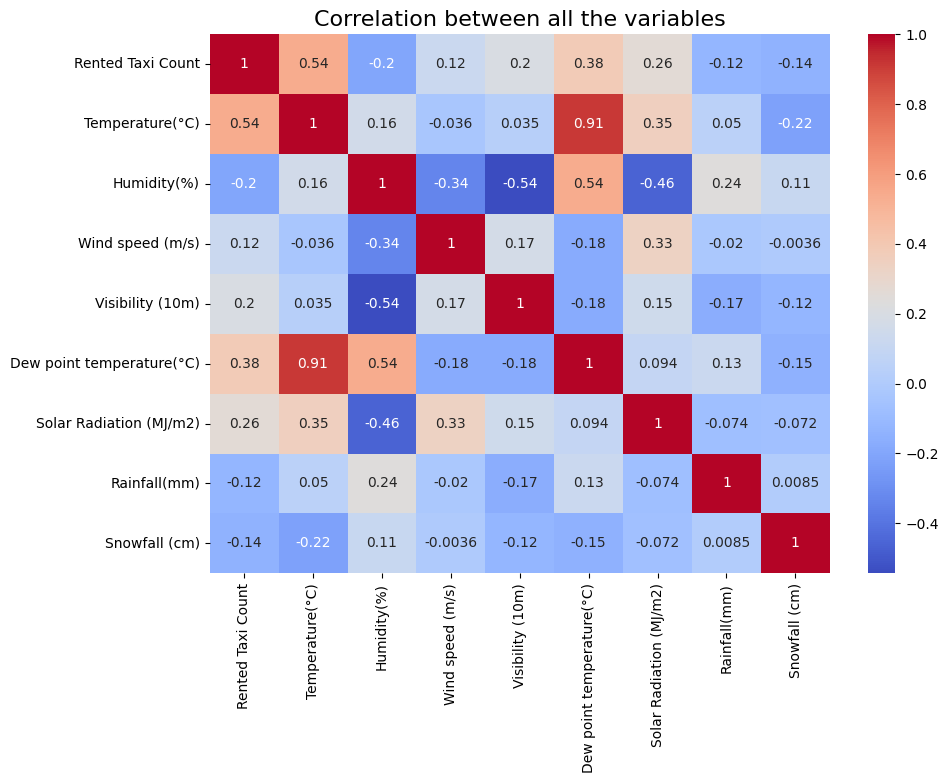

In [ ]:
#Heatmap for co-relation in features
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the variables', size=16)
plt.show()

In [ ]:
df.drop(columns= ['Dew point temperature(°C)'], inplace=True) #since it has high correlation

Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of Rented Taxi acording to Month ')]

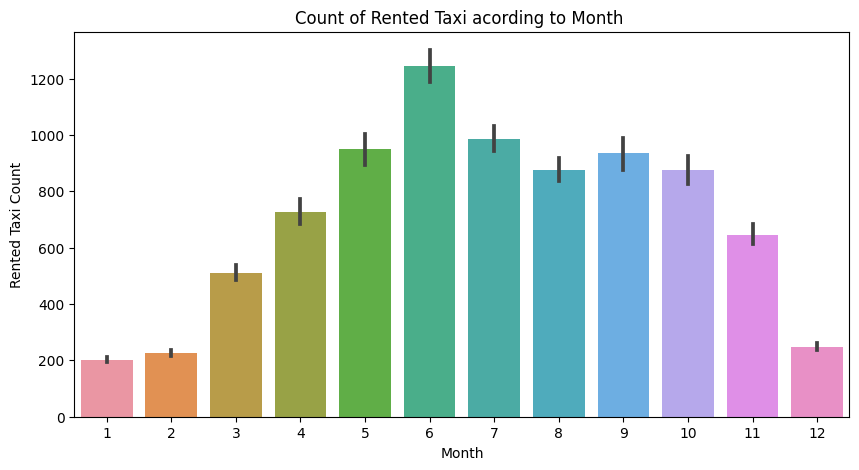

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='Month',y='Rented Taxi Count')
ax.set(title='Count of Rented Taxi acording to Month ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

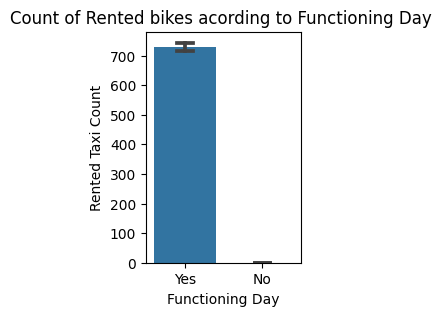

In [ ]:
fig,ax=plt.subplots(figsize=(2,3))
sns.barplot(data=df,x='Functioning Day',y='Rented Taxi Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

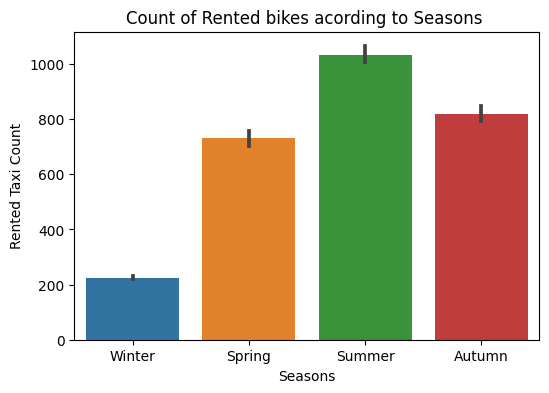

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=df,x='Seasons',y='Rented Taxi Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

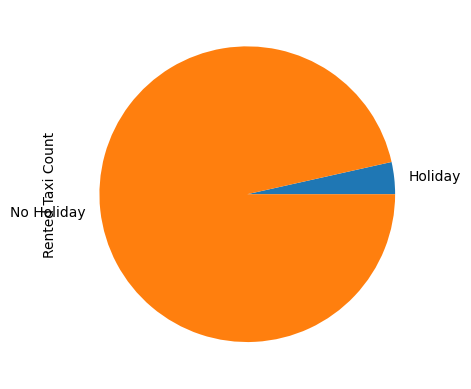

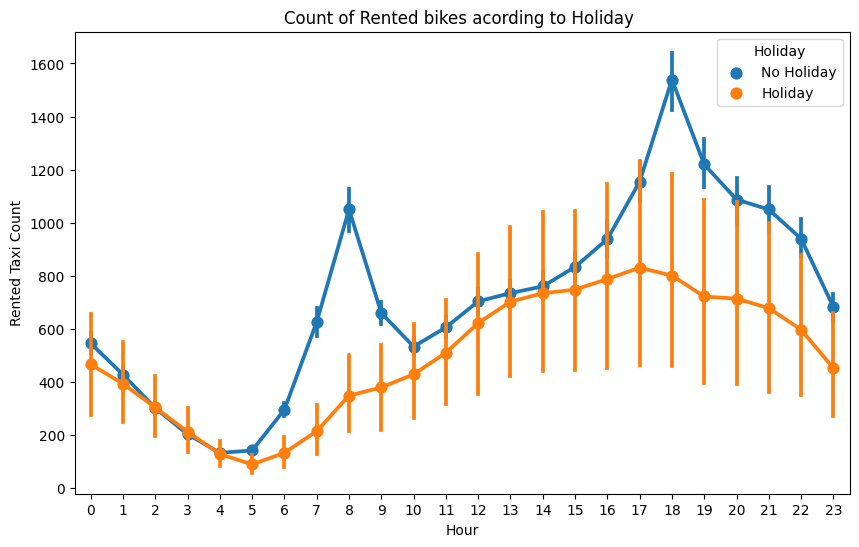

In [ ]:
df.groupby('Holiday').sum()['Rented Taxi Count'].plot.pie(radius=1)
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=df,x='Hour',y='Rented Taxi Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

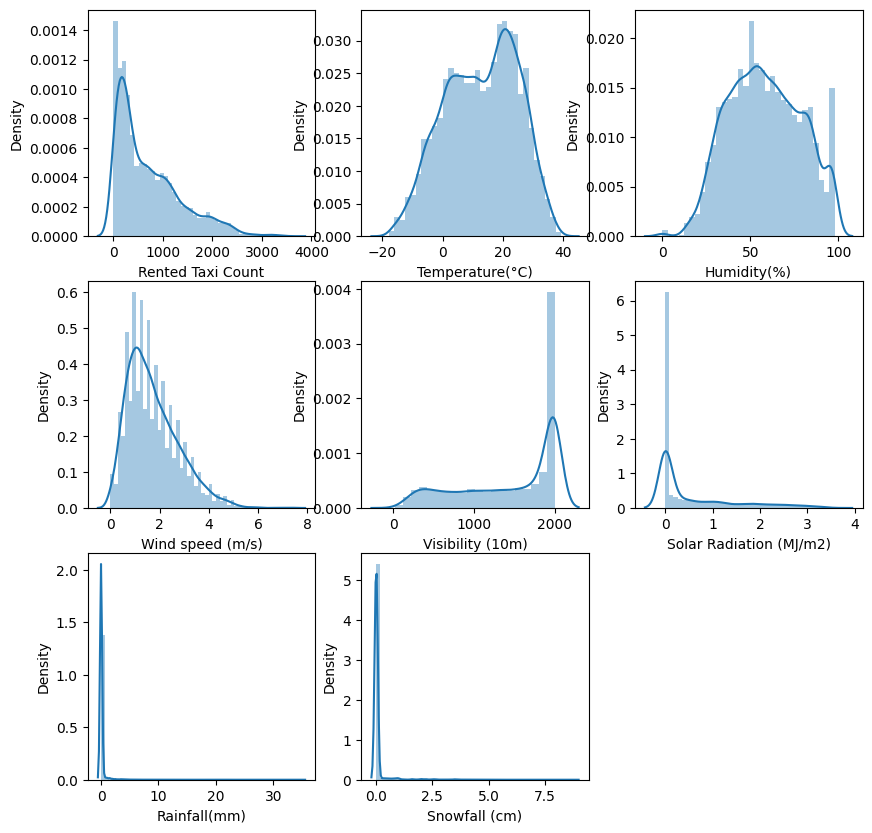

In [ ]:
numerical_columns=['Rented Taxi Count','Temperature(°C)','Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)'	,'Rainfall(mm)'	,'Snowfall (cm)']
plt.figure(figsize=(10,10))
for index,item in enumerate(numerical_columns):
  plt.subplot(3,3,index+1)
  sns.distplot(df[item])

Label Encoding

In [ ]:
# creating dummy variables for categorical feature --> Seasons, month, DayOfWeek, year, fuctioning day, holiday
seasons = pd.get_dummies(df['Seasons'])
working_day = pd.get_dummies(df['Holiday'])
F_day = pd.get_dummies(df['Functioning Day'])
month = pd.get_dummies(df['Month'])
week_day = pd.get_dummies(df['Week'])
df = pd.concat([df,seasons,working_day,F_day,month,week_day],axis=1)
# dropping columns for which dummy variables were created
df.drop(['Seasons','Holiday','Functioning Day','Week','Month'],axis=1,inplace=True)

In [ ]:
df.shape

(8760, 30)

In [ ]:
# function to calculate Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
vif_data['VIF'] = round(vif_data['VIF'],2)

print(vif_data)
df=df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1)

                    feature    VIF
0         Rented Taxi Count   2.45
1                      Hour   1.45
2           Temperature(°C)  10.70
3               Humidity(%)   3.15
4          Wind speed (m/s)   1.32
5          Visibility (10m)   2.30
6   Solar Radiation (MJ/m2)   2.02
7              Rainfall(mm)   1.10
8             Snowfall (cm)   1.14
9                    Autumn    inf
10                   Spring    inf
11                   Summer    inf
12                   Winter    inf
13               No Holiday   1.05
14                       No    inf
15                      Yes    inf
16                        1    inf
17                        2    inf
18                        3    inf
19                        4    inf
20                        5    inf
21                        6    inf
22                        7    inf
23                        8    inf
24                        9    inf
25                       10    inf
26                       11    inf
27                  

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Taxi Count, dtype: float64

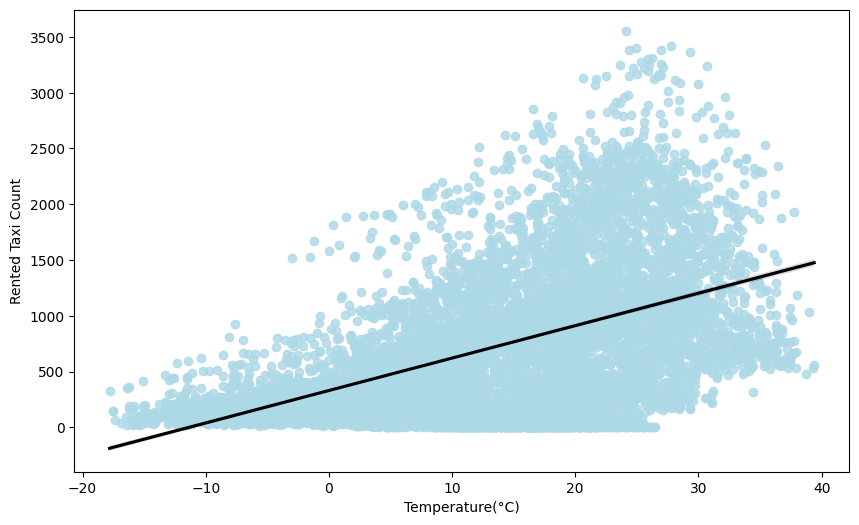

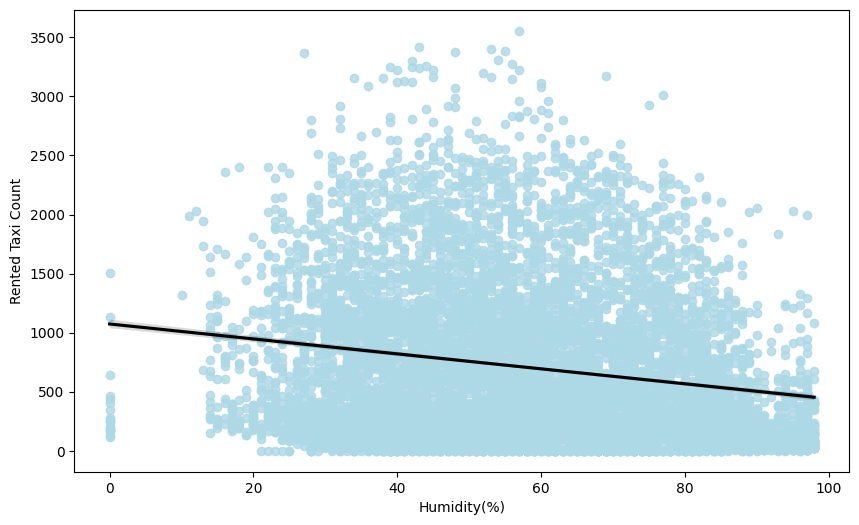

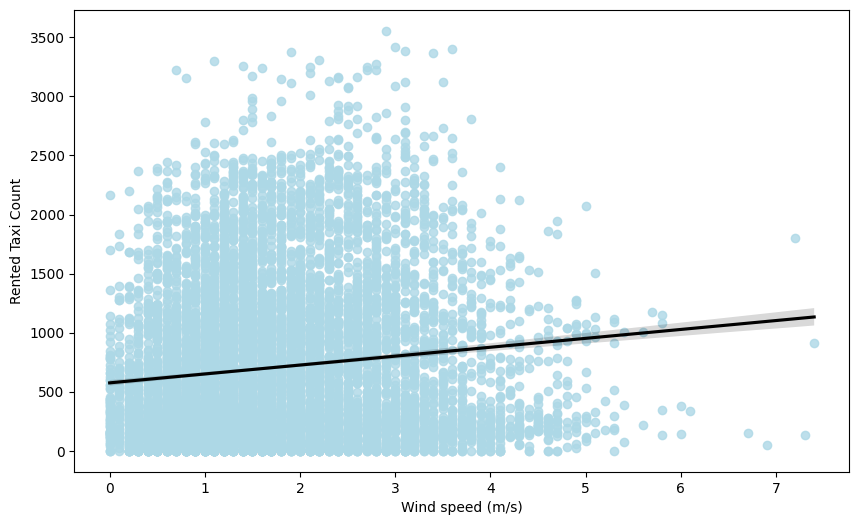

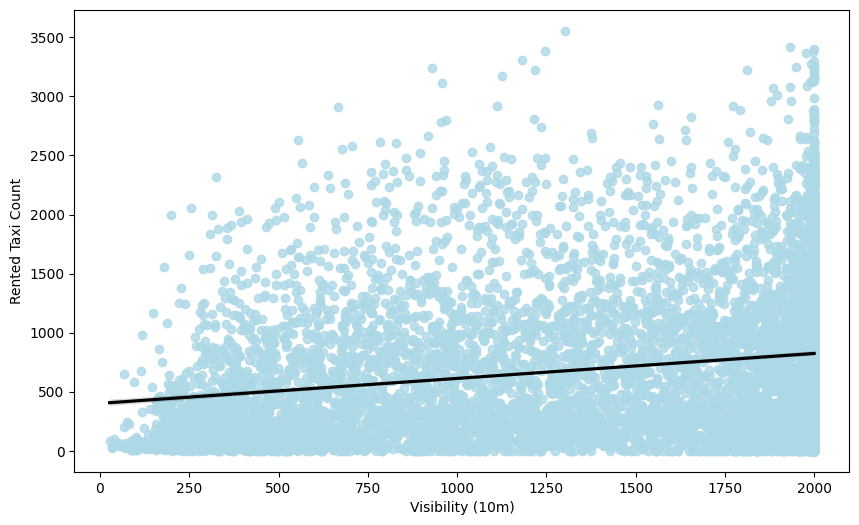

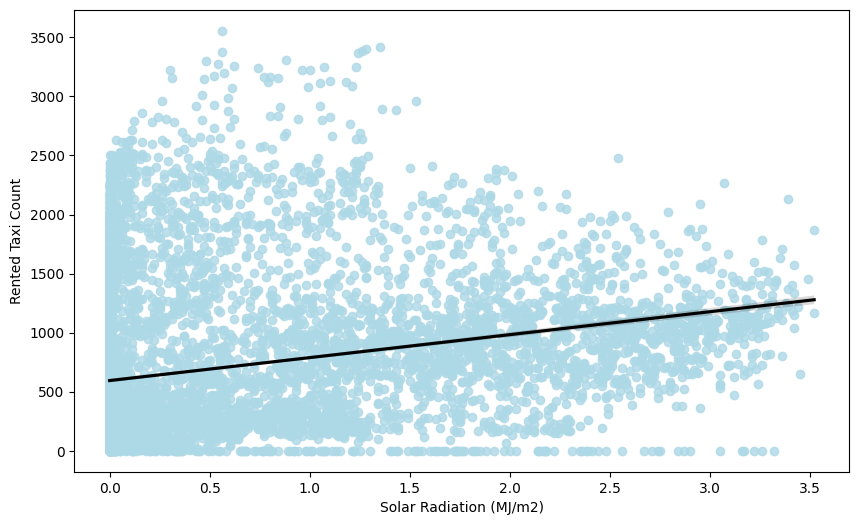

In [ ]:
#Regression plot
numerical_columns=['Temperature(°C)','Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)'	]
for col in numerical_columns:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Taxi Count'],scatter_kws={"color": 'lightblue'}, line_kws={"color": "black"})
#Temperature,solar radiation,windspeed,visibility are positively related to target variable ,the rented bike count increases with increase of these features

#Assign the value in X and Y
X = df.drop(columns=['Rented Taxi Count'], axis=1)
y = np.sqrt(df['Rented Taxi Count'])
X.head()
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
# standardizing the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

(6570, 27)
(2190, 27)


LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg= LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
y_pred_test

array([ 4.92518040e+11,  1.04675817e+13,  3.60607683e+11, ...,
       -4.21690233e+12, -1.32460701e+13, -4.98311701e+11])

In [ ]:
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 52.17089764178148
RMSE : 7.222942450399385
MAE : 5.541089172590913
R2 : 0.661207431198201
Adjusted R2 : 0.656976441671074


WITH L2 REGULARISATION

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge.score(X_train, y_train)

0.6612877462313392

In [ ]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

MSE  = mean_squared_error(y_test,y_pred_test_ridge)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2_ridge_test = r2_score(y_test,y_pred_test_ridge)
print("R2 :" ,r2_ridge_test)
Adjusted_R2=1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) #final r2 score for linear regression
print("Adjusted R2 : ",Adjusted_R2)

MSE : 52.49327021316498
RMSE : 7.245223958799685
R2 : 0.6676934518885937
Adjusted R2 :  0.6635434626198574


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
Y_pred_train =regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)
print("Y pred test: ",Y_pred_test)
DT = r2_score(Y_pred_test,y_test)
print("R2 score for y_pred test and y_test: ",DT)

Y pred test:  [18.62793601 26.60826939 17.2626765  ... 28.67054237  0.
 38.01315562]
R2 score for y_pred test and y_test:  0.8518344742640979


RANDOM FOREST REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)
rf_reg.fit(X_train, y_train)
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)
print("Y pred test: ",pred_test)

Y pred test:  [17.35422888 25.19490683 16.86576794 ... 30.66004359  0.
 38.88755511]


In [ ]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')
RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')
R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score_train= {R2_Score_train}')

MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')
RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score_test= {R2_Score_test}')

MSE= 1.515237260228102
RMSE= 1.2309497391153312
R2_Score_train= 0.9901602014352585
MSE= 11.772805933756954
RMSE= 3.4311522749299477
R2_Score_test= 0.925472722778641


In [ ]:
models= ['Ridge_model','Decision_Tree_model','random forest']
R2_value= [Adjusted_R2,DT,R2_Score_test]
compare_models = pd.DataFrame([R2_value],columns=models,index =['r2_value'])
compare_models

,Ridge_model,Decision_Tree_model,random forest
r2_value,0.663543,0.851834,0.925473


**Conclusion**

● Hour of the day holds most importance among all the features for prediction of dataset.

● It is observed that highest number bike rentals counts in Autumn/fall and Summer Seasons and the lowest in Spring season.

● We observed that the highest number of bike rentals on a clear day and the lowest on
a snowy or rainy day.

● the top 5 important features of our dataset are: Season, Temperature, Hour, Day, Humidity.

Out of 3 models used, RandomForest Regressor provides highest accuracy with the given hyperparameters.